# Chi-Squared


## Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [2]:
np.random.seed(12345678)

In [3]:
n = 31
z = np.linspace(0, 10, n)
sx = np.abs(0.65*np.random.randn(n)) + 0.2 # + 5.82 insenible à la grossierté
f = np.poly1d([3, 2])
e = np.array([si*np.random.randn(1)[0] for si in sx])
x = f(z) + e
#y[0] = 0

In [4]:
from chisquare import Chi2

#### Goodness of Fit

 - https://en.wikipedia.org/wiki/Goodness_of_fit
 - http://physics.ucsc.edu/~drip/133/ch4.pdf
 - https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2.html
 - http://www.astroml.org/book_figures/chapter4/fig_chi2_eval.html

In [5]:
from scipy import stats

In [6]:
X2 = Chi2(x, mu=f(z), sx=sx, dof=2)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d3aeef28>)

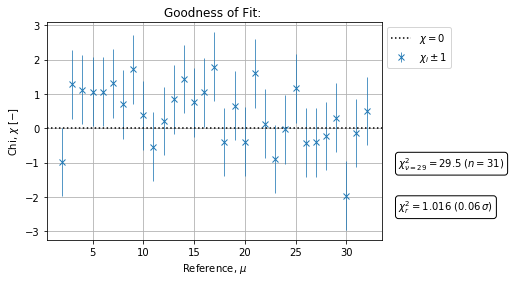

In [7]:
X2.plot()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d38098d0>)

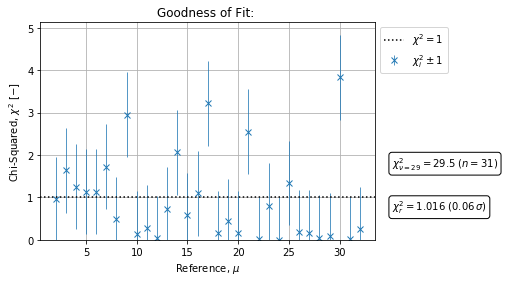

In [8]:
X2.plot(mode='chi2')

In [9]:
X2 = Chi2(x, model=f, predictor=z, sx=sx, dof=2)

In [10]:
X2.chi2()

29.45975396850317

In [11]:
X2.chi2r()

1.0158535851207988

In [12]:
X2.chi2rs()

0.06036865359725194

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d3a6b6a0>)

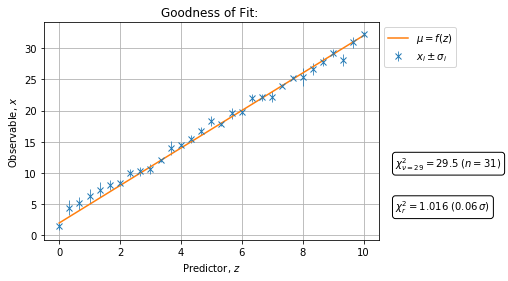

In [13]:
X2.plot('model')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d3b090f0>)

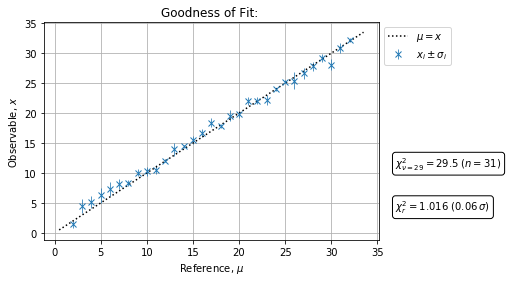

In [14]:
X2.plot('units')

In [15]:
import pandas as pd

In [26]:
df = pd.read_pickle('../../../../cganty/watson.df')
dfy = df.groupby(df.index.year).agg(['mean', 'std'])[('NO2', '41R002', 168)].reset_index()
dfy

,timevalue,mean,std
0,2010,53.746816,23.534804
1,2011,49.965163,24.496782
2,2012,48.141734,22.740323
3,2013,49.462900,23.652336
4,2014,47.378058,23.482891
5,2015,45.177718,22.092334
6,2016,47.727428,22.558829
7,2017,49.249415,23.558852
8,2018,39.333957,21.292086


In [49]:
zfit = dfy['timevalue'].values
xfit = dfy['mean'].values
sxfit = np.sqrt(dfy['std'].values)

In [50]:
fit = np.poly1d(np.polyfit(zfit, xfit, deg=1, w=1/sxfit))

In [51]:
X = Chi2(xfit, model=fit, predictor=zfit, sx=sxfit, dof=2)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d62216a0>)

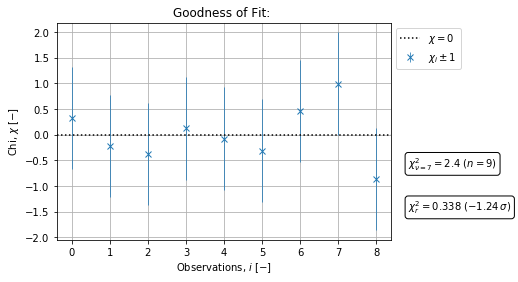

In [56]:
X.plot(obs=True)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d62f40f0>)

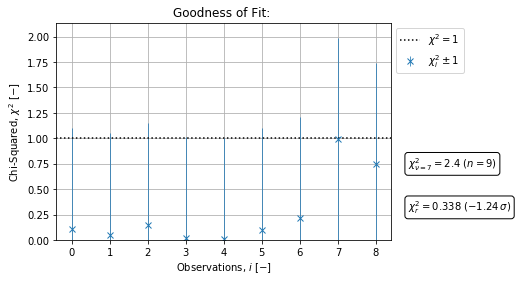

In [57]:
X.plot(mode='chi2', obs=True)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d6087780>)

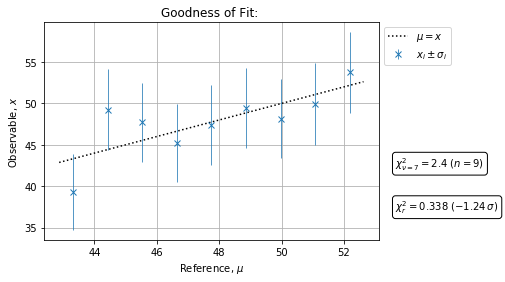

In [54]:
X.plot('units')

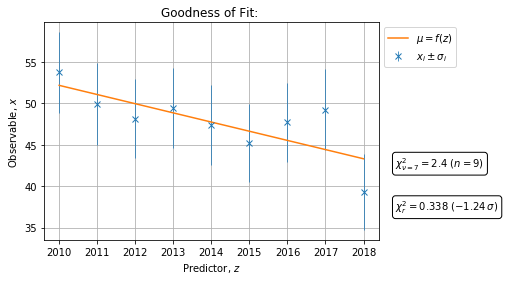

In [58]:
fig, _ = X.plot('model')

In [59]:
fig.savefig('test.png', dpi=180)